# Линейная регрессия и основные библиотеки Python для анализа данных и научных вычислений

Это задание посвящено линейной регрессии. На примере прогнозирования роста человека по его весу Вы увидите, какая математика за этим стоит, а заодно познакомитесь с основными библиотеками Python. [Источник данных](https://drive.google.com/file/d/1lmdWM1NW2YPEj_OFWI_9Otf_5HyYcR2-/view?usp=sharing).

## Задание 1. Первичный анализ данных c Pandas

В этом заданиии мы будем использовать данные [SOCR](http://wiki.stat.ucla.edu/socr/index.php/SOCR_Data_Dinov_020108_HeightsWeights) по росту и весу 25 тысяч подростков.

**[1].** Если у Вас не установлена библиотека Seaborn - выполните в терминале команду *conda install seaborn*. (Seaborn не входит в сборку Anaconda, но эта библиотека предоставляет удобную высокоуровневую функциональность для визуализации данных).

In [2]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

Считаем данные по росту и весу (*weights_heights.csv*, приложенный в задании) в объект Pandas DataFrame:

In [19]:
data = pd.read_csv('weights_heights.csv', index_col='Index')

Чаще всего первое, что надо надо сделать после считывания данных - это посмотреть на первые несколько записей. Так можно отловить ошибки чтения данных (например, если вместо 10 столбцов получился один, в названии которого 9 точек с запятой). Также это позволяет познакомиться с данными, как минимум, посмотреть на признаки и их природу (количественный, категориальный и т.д.). 

После этого стоит построить гистограммы распределения признаков - это опять-таки позволяет понять природу признака (степенное у него распределение, или нормальное, или какое-то еще). Также благодаря гистограмме можно найти какие-то значения, сильно не похожие на другие - "выбросы" в данных. 
Гистограммы удобно строить методом *plot* Pandas DataFrame с аргументом *kind='hist'*.

**Пример.** Построим гистограмму распределения роста подростков из выборки *data*. Используем метод *plot* для DataFrame *data* c аргументами *y='Height'* (это тот признак, распределение которого мы строим)

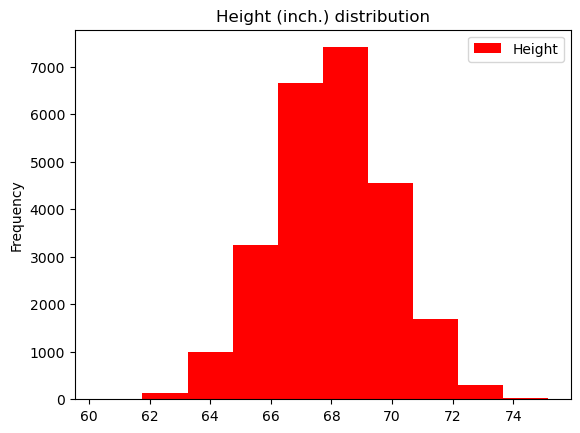

In [20]:
data.plot(y='Height', kind='hist', color='red',  title='Height (inch.) distribution')
plt.show()

Аргументы:

- *y='Height'* - тот признак, распределение которого мы строим
- *kind='hist'* - означает, что строится гистограмма
- *color='red'* - цвет

**[2]**. Посмотрите на первые 5 записей. Нарисуйте гистограмму распределения веса. Сделайте гистограмму зеленой, подпишите картинку.

In [21]:
data.head()

,Height,Weight
Index,,
1,65.78331,112.9925
2,71.51521,136.4873
3,69.39874,153.0269
4,68.21660,142.3354
5,67.78781,144.2971


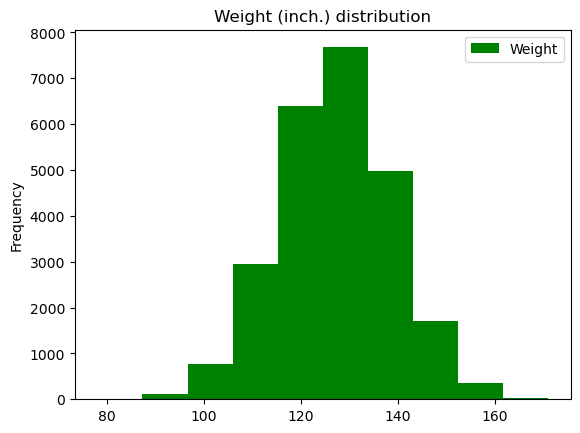

In [22]:
data.plot(y='Weight', kind='hist', color='green', title='Weight (inch.) distribution')
plt.show()

Один из эффективных методов первичного анализа данных - отображение попарных зависимостей признаков. Создается $m \times m$ графиков (*m* - число признаков), где по диагонали рисуются гистограммы распределения признаков, а вне диагонали - scatter plots зависимости двух признаков. 

Чтобы проиллюстрировать этот метод, интересней добавить третий признак. Создадим признак *Индекс массы тела* ([BMI](https://en.wikipedia.org/wiki/Body_mass_index)).

In [23]:
def make_bmi(height_inch, weight_pound):
    METER_TO_INCH, KILO_TO_POUND = 39.37, 2.20462
    return (weight_pound / KILO_TO_POUND) / \
           (height_inch / METER_TO_INCH) ** 2

In [24]:
data['BMI'] = data.apply(lambda row: make_bmi(row['Height'], row['Weight']), axis=1)
display(data)

,Height,Weight,BMI
Index,,,
1,65.78331,112.9925,18.357573
2,71.51521,136.4873,18.762577
3,69.39874,153.0269,22.338895
4,68.21660,142.3354,21.504526
5,67.78781,144.2971,22.077581
...,...,...,...
24996,69.50215,118.0312,17.178982
24997,64.54826,120.1932,20.281866
24998,64.69855,118.2655,19.863971


**[3].** Постройте картинку, на которой будут отображены попарные зависимости признаков , 'Height', 'Weight' и 'BMI' друг от друга.

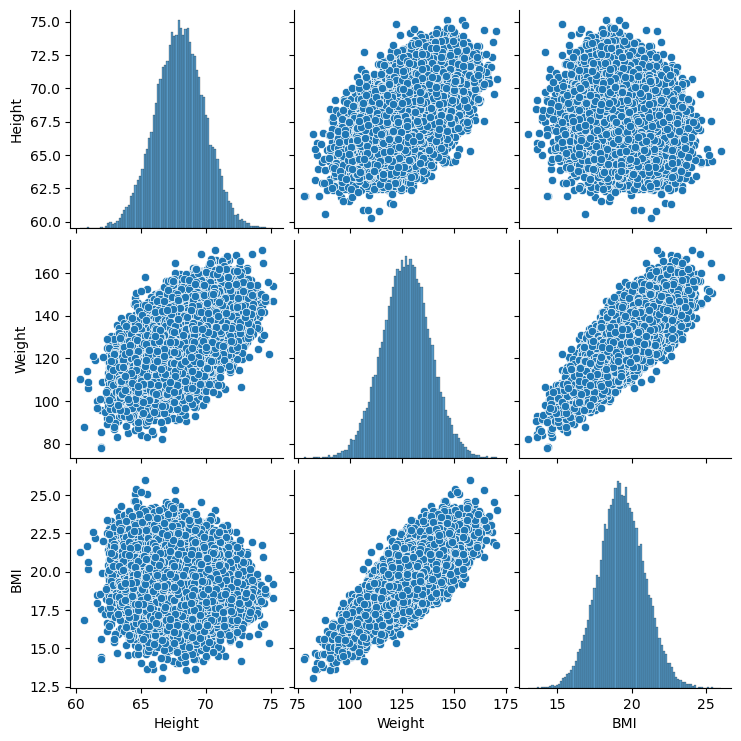

In [25]:
sns.pairplot(data)
plt.show()

Часто при первичном анализе данных надо исследовать зависимость какого-то количественного признака от категориального (скажем, зарплаты от пола сотрудника). В этом помогут "ящики с усами" - boxplots библиотеки Seaborn. Box plot - это компактный способ показать статистики вещественного признака (среднее и квартили) по разным значениям категориального признака. Также помогает отслеживать "выбросы" - наблюдения, в которых значение данного вещественного признака сильно отличается от других. 

**[4]**. Создайте в DataFrame *data* новый признак *weight_category*, который будет иметь 3 значения: 1 – если вес меньше 120 фунтов. (~ 54 кг.), 3 - если вес  больше или равен 150 фунтов (~68 кг.), 2 – в остальных случаях. Постройте «ящик с усами» (boxplot), демонстрирующий зависимость роста от весовой категории.

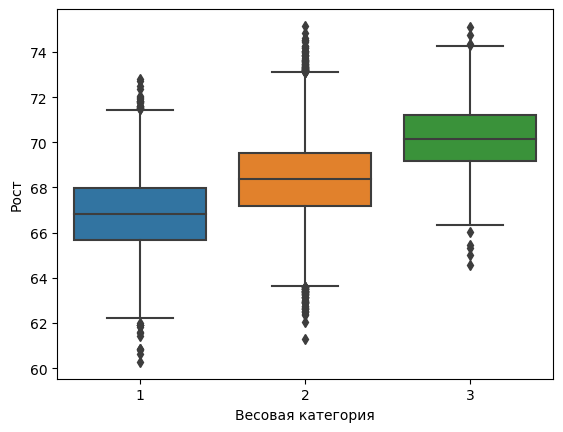

In [26]:
def weight_category(weight):
    if weight < 120:
        return 1
    elif weight >= 150:
        return 3
    else:
        return 2

data['weight_cat'] = data['Weight'].apply(weight_category)
sns.boxplot(x='weight_cat', y='Height', data=data).set(xlabel='Весовая категория', ylabel='Рост')
plt.show()

**[5].** Постройте scatter plot зависимости роста от веса. Подпишите картинку.

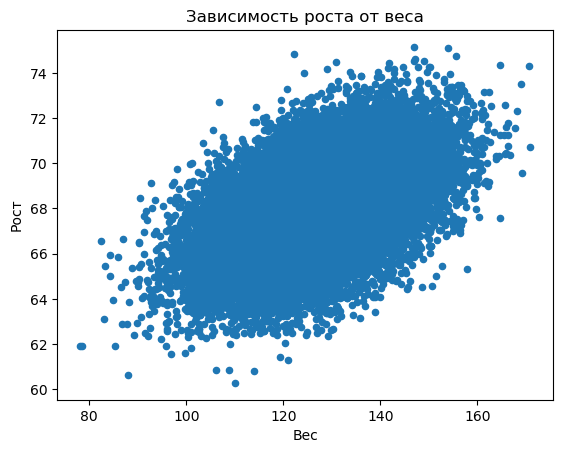

In [27]:
data.plot(x='Weight', y='Height', kind='scatter', title='Зависимость роста от веса').set(xlabel='Вес', ylabel='Рост')
plt.show()

## Задание 2. Минимизация квадратичной ошибки

В простейшей постановке задача прогноза значения вещественного признака по прочим признакам (задача восстановления регрессии) решается минимизацией квадратичной функции ошибки. 

**[6].** Напишите функцию, которая по двум параметрам $w_0$ и $w_1$ вычисляет квадратичную ошибку приближения зависимости роста $y$ от веса $x$ прямой линией $y = w_0 + w_1 * x$:
$$error(w_0, w_1) = \sum_{i=1}^n {(y_i - (w_0 + w_1 * x_i))}^2 $$
Здесь $n$ – число наблюдений в наборе данных, $y_i$ и $x_i$ – рост и вес $i$-ого человека в наборе данных. 

In [28]:
def quadraticError(w0, w1):
    row_data, col_data = data.shape
    errors = np.zeros(row_data)
    errors = (data['Height'] - (w0 + w1 * data['Weight'])) ** 2
    return errors.sum()

Итак, мы решаем задачу: как через облако точек, соответсвующих наблюдениям в нашем наборе данных, в пространстве признаков "Рост" и "Вес" провести прямую линию так, чтобы минимизировать функционал из п. 6. Для начала давайте отобразим хоть какие-то прямые и убедимся, что они плохо передают зависимость роста от веса.

**[7].** Проведите на графике из п. 5 Задания 1 две прямые, соответствующие значениям параметров ($w_0, w_1) = (60, 0.05)$ и ($w_0, w_1) = (50, 0.16)$. Подпишите оси и график. 

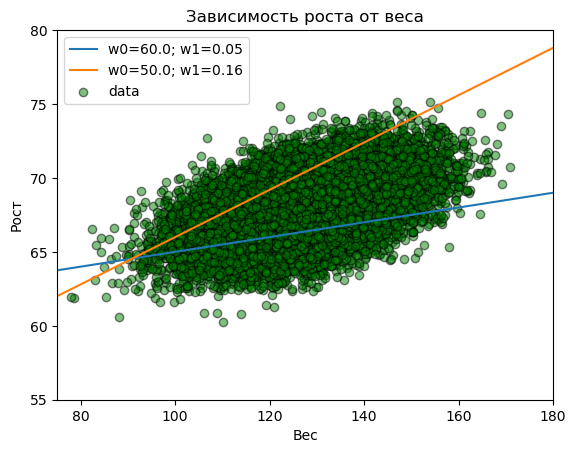

In [29]:
#функция y
func = lambda x, w0, w1: w0 + w1 * x

#значение w0 и w1
w_values = np.array([[60, 0.05], [50, 0.16]])

#значения оси x
x_axis = np.linspace(0, 180, 360)

#нулевая матрица для значений y
y_axis = np.zeros((w_values.shape[0], 360))

#значение y и построение линейных прямых
for i in np.arange(w_values.shape[0]):
    y_axis[i] = np.array(func(x_axis, w_values[i, 0], w_values[i, 1]))
    name_plot = f'w0={w_values[i, 0]}; w1={w_values[i, 1]}'
    plt.plot(x_axis, y_axis[i], label=name_plot)

#построение точек зависиомсти роста от веса
plt.scatter(data['Weight'], data['Height'], alpha=0.5, c='green', edgecolors='black', label='data')
plt.axis([75, 180, 55, 80])
plt.legend()
plt.title('Зависимость роста от веса')
plt.xlabel('Вес')
plt.ylabel('Рост')
plt.show()

Минимизация квадратичной функции ошибки - относительная простая задача, поскольку функция выпуклая. Для такой задачи существует много методов оптимизации. Посмотрим, как функция ошибки зависит от одного параметра (наклон прямой), если второй параметр (свободный член) зафиксировать.

**[8].** Постройте график зависимости функции ошибки, посчитанной в п. 6, от параметра $w_1$ при $w_0$ = 50. Подпишите оси и график.

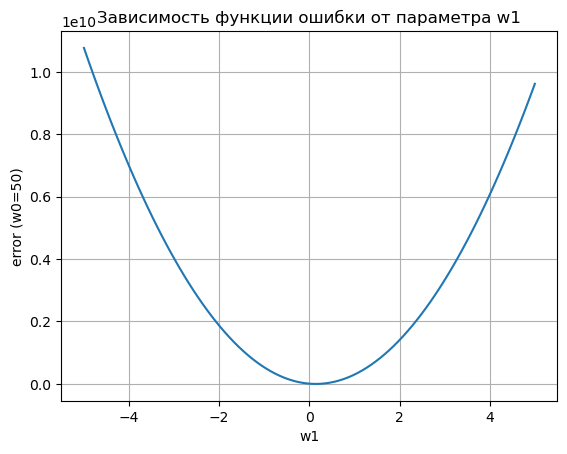

In [30]:
#значение оси x
w1_axis = np.linspace(-5.0, 5.0, 100)

#значение ошибки
errors_w1 = np.zeros((100))
for i in np.arange(100):
    errors_w1[i] = quadraticError(50.0, w1_axis[i])

#построение графика
plt.plot(w1_axis, errors_w1)
plt.title('Зависимость функции ошибки от параметра w1')
plt.xlabel('w1')
plt.ylabel('error (w0=50)')
plt.grid()
plt.show()

Теперь методом оптимизации найдем "оптимальный" наклон прямой, приближающей зависимость роста от веса, при фиксированном коэффициенте $w_0 = 50$.

**[9].** С помощью метода *minimize_scalar* из *scipy.optimize* найдите минимум функции, определенной в п. 6, для значений параметра  $w_1$ в диапазоне [-5,5]. Проведите на графике из п. 5 Задания 1 прямую, соответствующую значениям параметров ($w_0$, $w_1$) = (50, $w_1\_opt$), где $w_1\_opt$ – найденное в п. 8 оптимальное значение параметра $w_1$. 

In [31]:
from scipy.optimize import minimize_scalar

min = minimize_scalar(lambda w1: quadraticError(50., w1), bounds=(-5, 5))
w1_opt = min.x
print(f'w1={w1_opt:.3f}; func={min.fun:.3f}')

w1=0.141; func=79512.217


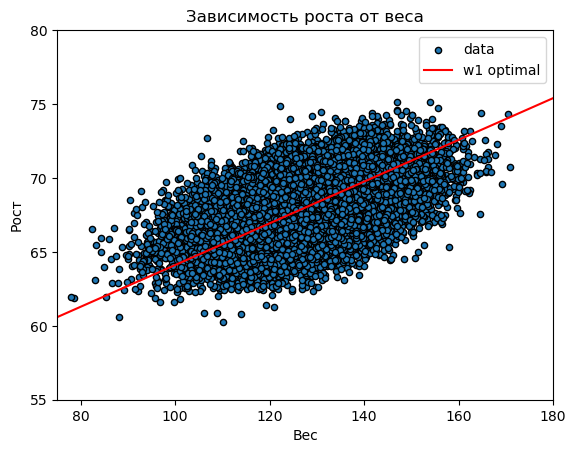

In [32]:
#значение y при оптимальном w1
y_axis_opt = np.array(func(x_axis, 50.0, w1_opt))
                      
#построение графиков
data.plot(x='Weight', y='Height', kind='scatter', edgecolors='black', label='data', title='Зависимость роста от веса').set(xlabel='Вес', ylabel='Рост')
plt.plot(x_axis, y_axis_opt, c='red', label='w1 optimal')
plt.axis([75, 180, 55, 80])
plt.legend()
plt.show()

При анализе многомерных данных человек часто хочет получить интуитивное представление о природе данных с помощью визуализации. Увы, при числе признаков больше 3 такие картинки нарисовать невозможно. На практике для визуализации данных в 2D и 3D в данных выделаяют 2 или, соответственно, 3 главные компоненты (как именно это делается - мы увидим далее в курсе) и отображают данные на плоскости или в объеме. 

Посмотрим, как в Python рисовать 3D картинки, на примере отображения функции $z(x,y) = sin(\sqrt{x^2+y^2})$ для значений $x$ и $y$ из интервала [-5,5] c шагом 0.25.

In [33]:
from matplotlib import cm

Создаем объекты типа matplotlib.figure.Figure (рисунок) и  matplotlib.axes._subplots.Axes3DSubplot (ось). 

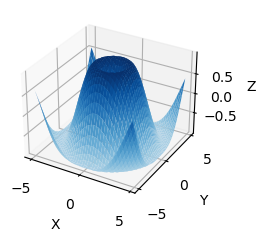

In [37]:
plt.style.use('_mpl-gallery')

# Make data
X = np.arange(-5, 5, 0.25)
Y = np.arange(-5, 5, 0.25)
X, Y = np.meshgrid(X, Y)
R = np.sqrt(X**2 + Y**2)
Z = np.sin(R)

# Plot the surface
fig, ax = plt.subplots(subplot_kw={"projection": "3d"})
ax.plot_surface(X, Y, Z, vmin=Z.min() * 2, cmap=cm.Blues)
ax.set(xlabel='X',
       ylabel='Y',
       zlabel='Z')

plt.show()

**[10].** Постройте 3D-график зависимости функции ошибки, посчитанной в п.6 от параметров $w_0$ и $w_1$. Подпишите ось $x$ меткой «Intercept», ось $y$ – меткой «Slope», a ось $z$ – меткой «Error».

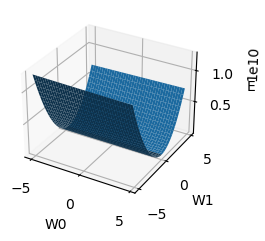

In [38]:
W0 = np.arange(-5., 5., 0.25)
W1 = np.arange(-5., 5., 0.25)
W0, W1 = np.meshgrid(W0, W1)
error_vect = np.vectorize(quadraticError)
E = np.array( error_vect(W0.ravel(), W1.ravel()) )
E.shape = W0.shape

fig, ax = plt.subplots(subplot_kw={"projection": "3d"})
ax.plot_surface(W0, W1, E)
ax.set(xlabel='W0',
       ylabel='W1',
       zlabel='E')

plt.show()

**[11].** С помощью метода *minimize* из scipy.optimize найдите минимум функции, определенной в п. 6, для значений параметра $w_0$ в диапазоне [-100,100] и $w_1$ - в диапазоне [-5, 5]. Начальная точка – ($w_0$, $w_1$) = (0, 0). Используйте метод оптимизации L-BFGS-B (аргумент method метода minimize). Проведите на графике из п. 5 Задания 1 прямую, соответствующую найденным оптимальным значениям параметров $w_0$ и $w_1$. Подпишите оси и график.

In [34]:
from scipy.optimize import minimize

In [35]:
quadratic_error_w = lambda w: quadraticError(w[0], w[1])
bnds_w = ((-100, 100), (-5, 5))
point_0 = (0., 0.0)
res_opt = minimize(quadratic_error_w, point_0, bounds=bnds_w, method='L-BFGS-B')
print(res_opt)
w0_res = res_opt.x[0]
w1_res = res_opt.x[1]
print(f'Optimal values: w0={w0_res:.3f}, w1={w1_res:.3f}')

      fun: 67545.28708631586
 hess_inv: <2x2 LbfgsInvHessProduct with dtype=float64>
      jac: array([-0.00291038, -0.00582077])
  message: 'CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH'
     nfev: 36
      nit: 5
     njev: 12
   status: 0
  success: True
        x: array([57.57178031,  0.08200646])
Optimal values: w0=57.572, w1=0.082


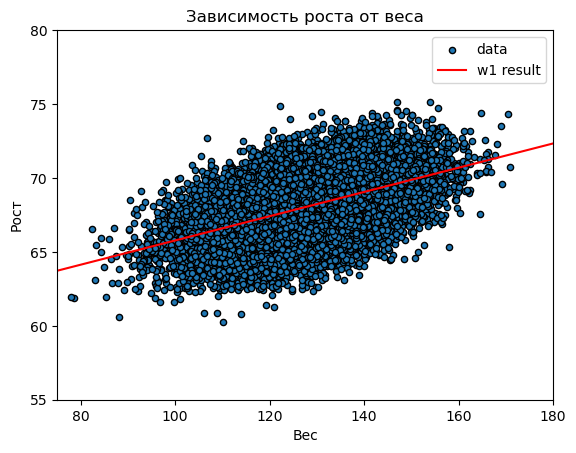

In [36]:
#конечное значение y
y_axis_res = func(x_axis, w0_res, w1_res)

#построение графика
data.plot(x='Weight', y='Height', kind='scatter', edgecolors='black', label='data', title='Зависимость роста от веса').set(xlabel='Вес', ylabel='Рост')
plt.plot(x_axis, y_axis_res, c='red', label='w1 result')
plt.axis([75, 180, 55, 80])
plt.legend()
plt.show()